<a href="https://colab.research.google.com/github/aydanali/ECON3916-Stats-and-ML/blob/main/Assignment2/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phase 1

In [8]:
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [9]:
latency_logs

array([  46,   36,   28,   38,   34,   29,   44,   48,   26,   25,   26,
         29,   29,   39,   38,   21,   43,   26,   25,   43,   33,   40,
         38,   39,   41,   41,   23,   22,   42,   22,   46,   38,   41,
         20,   44,   34,   21,   27,   38,   34,   45,   34,   32,   46,
         28,   21,   33,   43,   22,   36,   38,   47,   47,   44,   39,
         43,   27,   46,   47,   24,   49,   35,   37,   28,   23,   31,
         35,   43,   29,   42,   38,   30,   35,   49,   28,   23,   23,
         24,   36,   32,   43,   36,   32,   30,   47,   45,   44,   42,
         33,   36,   48,   46,   39,   47,   49,   23,   43,   46,   38,
         43,   30,   22,   40,   45,   31,   47,   25,   37,   31,   44,
         29,   37,   46,   32,   45,   45,   48,   48,   43,   49,   42,
         21,   49,   33,   29,   37,   27,   23,   27,   39,   34,   21,
         33,   21,   39,   42,   40,   35,   23,   45,   37,   43,   28,
         20,   35,   24,   25,   32,   48,   35,   

In [6]:
def calculate_mad(data):
    # 1. Calculate the Median of the data
    median = np.median(data)
    # 2. Calculate Absolute Deviations (|x - median|)
    absol_dev = np.abs(data - median)
    # 3. Return the Median of those deviations
    mad = np.median(absol_dev)

    return mad

In [12]:
print("Standard Deviation of the data: ", np.std(latency_logs))
print("Median Absolute Deviation of the data: ", calculate_mad(latency_logs))


Standard Deviation of the data:  488.97129312465773
Median Absolute Deviation of the data:  8.0


The standard deviation of the data is 488.97 and the median absolute deviation (MAD) is 8. Standard deviation measures the spread of the data aroud relative to the mean. It is calculated by averaging the square of the difference the data points and their mean, and taking the square root of that. It is a great way to see how far the "average" point is away from the mean. MAD takes the median of the difference between the data points and their median. It tests the data's dispersion from the median.

MAD is resistant to outliers, whereas SD is not. Infact, SD weighs outliers heavier because of it squares every number within the calculation. In our latency data, the 20 large outliers pull the standard deviation way higher than the MAD. Since the data has strong skewness, MAD could be a better way of getting a robust snapshot.

# Phase 2

In [14]:
def bayesian_audit(prior, sensitivity, specificity):
  # four possibilities: cheater flagged, cheater not flagged, not cheater flagged, not cheater not flagged
  true_positive = sensitivity * prior
  false_positive = (1 - sensitivity) * (1 - prior)

  # probability that someone is a cheater given that they are flagged
  posterior = true_positive / (true_positive + false_positive)

  return posterior

In [19]:
sensitivity = 0.98
specificity = 0.98

scenario_a = bayesian_audit(0.50, sensitivity, specificity)
scenario_b = bayesian_audit(0.05, sensitivity, specificity)
scenario_c = bayesian_audit(0.001, sensitivity, specificity)

print(f"Scenario A (Bootcamp, 50% base rate): {scenario_a:.4f} or {scenario_a*100:.2f}%")
print(f"Scenario B (Econ Class, 5% base rate): {scenario_b:.4f} or {scenario_b*100:.2f}%")
print(f"Scenario C (Honors Seminar, 0.1% base rate): {scenario_c:.4f} or {scenario_c*100:.2f}%")

Scenario A (Bootcamp, 50% base rate): 0.9800 or 98.00%
Scenario B (Econ Class, 5% base rate): 0.7206 or 72.06%
Scenario C (Honors Seminar, 0.1% base rate): 0.0468 or 4.68%


# Phase 3

In [24]:
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

# Write the calculation loop...

chi = 0
for i in range(len(observed)):
  chi += (observed[i] - expected[i])**2 / expected[i]

print(f"Chi Squared Statistic: {chi}")
print(f"Critical Value: 3.84")
print("The app test is value because the chi squared statistic is less than the critical value.")

Chi Squared Statistic: 2.5
Critical Value: 3.84
The app test is value because the chi squared statistic is less than the critical value.


# Phase 4

SURVIVORSHIP BIAS IN CRYPTO MARKETS

Total Tokens Launched: 10,000
Survivors (Top 1%): 100
Dead Tokens (Bottom 99%): 9,900

------------------------------------------------------------
THE GRAVEYARD (All Tokens):
  Mean Market Cap:   $4,765.03
  Median Market Cap: $1,794.55

THE SURVIVORS (Top 1%):
  Mean Market Cap:   $149,081.06
  Median Market Cap: $91,506.48

------------------------------------------------------------
SURVIVORSHIP BIAS MULTIPLIER: 31.29x
If you only study survivors, you overestimate success by 31.29x


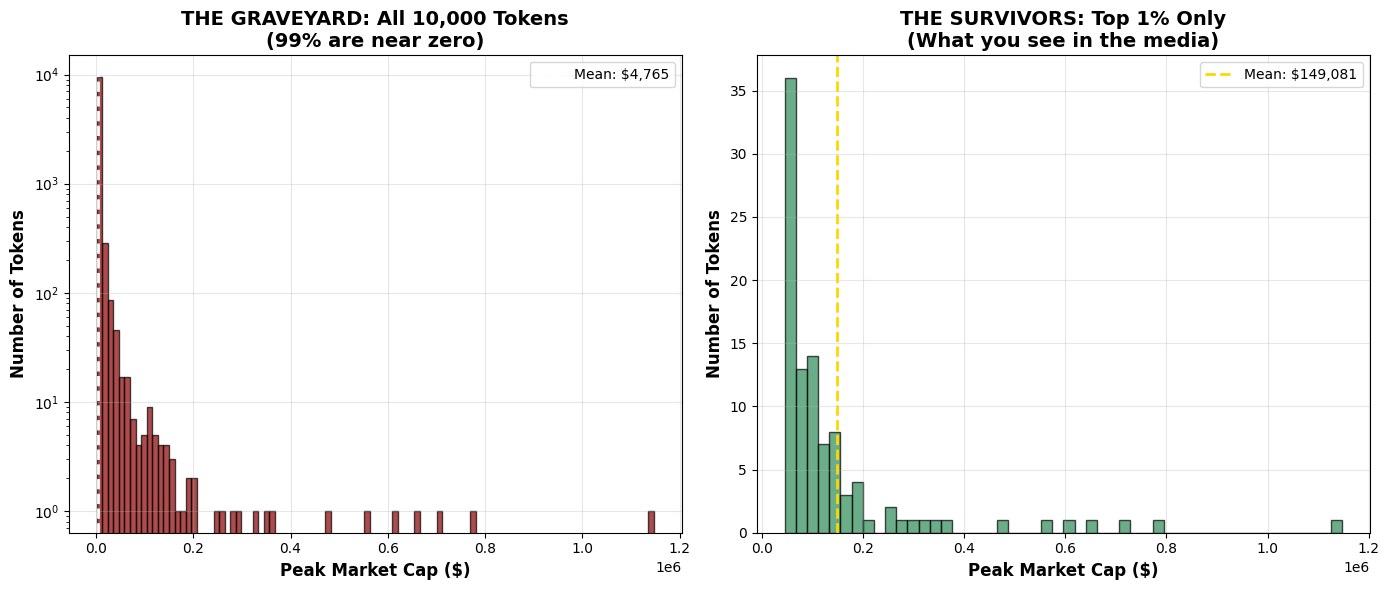


TOP 10 TOKENS BY MARKET CAP:
      token_id  peak_market_cap
531        532     1.147352e+06
3649      3650     7.791590e+05
9927      9928     7.073295e+05
6123      6124     6.567112e+05
1464      1465     6.111109e+05
5788      5789     5.593216e+05
6758      6759     4.711742e+05
7455      7456     3.565550e+05
3402      3403     3.531973e+05
5323      5324     3.279062e+05


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Simulate 10,000 token launches
n_tokens = 10_000

# Pareto Distribution (Power Law): shape parameter α = 1.16 creates extreme inequality
# Lower α = more extreme concentration at the top
alpha = 1.16
scale = 1_000  # Minimum market cap in dollars

# Generate peak market caps using Pareto distribution
peak_market_caps = (np.random.pareto(alpha, n_tokens) + 1) * scale

# Create "The Graveyard" - all tokens
df_all = pd.DataFrame({
    'token_id': range(1, n_tokens + 1),
    'peak_market_cap': peak_market_caps
})

# Create "Survivors" - top 1% only
threshold_99th = np.percentile(peak_market_caps, 99)
df_survivors = df_all[df_all['peak_market_cap'] >= threshold_99th].copy()

# Calculate means to show survivorship bias
mean_all = df_all['peak_market_cap'].mean()
mean_survivors = df_survivors['peak_market_cap'].mean()
median_all = df_all['peak_market_cap'].median()
median_survivors = df_survivors['peak_market_cap'].median()

# Print statistics
print("="*60)
print("SURVIVORSHIP BIAS IN CRYPTO MARKETS")
print("="*60)
print(f"\nTotal Tokens Launched: {n_tokens:,}")
print(f"Survivors (Top 1%): {len(df_survivors):,}")
print(f"Dead Tokens (Bottom 99%): {n_tokens - len(df_survivors):,}")
print("\n" + "-"*60)
print("THE GRAVEYARD (All Tokens):")
print(f"  Mean Market Cap:   ${mean_all:,.2f}")
print(f"  Median Market Cap: ${median_all:,.2f}")
print("\nTHE SURVIVORS (Top 1%):")
print(f"  Mean Market Cap:   ${mean_survivors:,.2f}")
print(f"  Median Market Cap: ${median_survivors:,.2f}")
print("\n" + "-"*60)
print(f"SURVIVORSHIP BIAS MULTIPLIER: {mean_survivors/mean_all:.2f}x")
print(f"If you only study survivors, you overestimate success by {mean_survivors/mean_all:.2f}x")
print("="*60)

# Visualization: Dual histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: The Graveyard (log scale to see the distribution)
axes[0].hist(df_all['peak_market_cap'], bins=100, color='#8B0000',
             alpha=0.7, edgecolor='black')
axes[0].axvline(mean_all, color='white', linestyle='--', linewidth=2,
                label=f'Mean: ${mean_all:,.0f}')
axes[0].set_xlabel('Peak Market Cap ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Tokens', fontsize=12, fontweight='bold')
axes[0].set_title('THE GRAVEYARD: All 10,000 Tokens\n(99% are near zero)',
                  fontsize=14, fontweight='bold')
axes[0].set_yscale('log')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Right: The Survivors (Top 1%)
axes[1].hist(df_survivors['peak_market_cap'], bins=50, color='#2E8B57',
             alpha=0.7, edgecolor='black')
axes[1].axvline(mean_survivors, color='gold', linestyle='--', linewidth=2,
                label=f'Mean: ${mean_survivors:,.0f}')
axes[1].set_xlabel('Peak Market Cap ($)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Tokens', fontsize=12, fontweight='bold')
axes[1].set_title('THE SURVIVORS: Top 1% Only\n(What you see in the media)',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('survivorship_bias_crypto.png', dpi=300, bbox_inches='tight')
plt.show()

# Bonus: Top 10 tokens
print("\nTOP 10 TOKENS BY MARKET CAP:")
print(df_all.nlargest(10, 'peak_market_cap')[['token_id', 'peak_market_cap']])